In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import norm
from scipy.stats import uniform
from sklearn.linear_model import LinearRegression

# Ejercicio 1

In [2]:
mean=0.04
std_dev=0.10
years=17
n_sims = 1000
annual_contribution = 20000
total_investment = years*annual_contribution

In [3]:
# Given parameters
def simulate(rates):

    # Initialize the value of the investment
    final_value = 0
    accum_by_year = []
    saved_by_year = []
    interest_by_year = []
    # Calculate the investment value year by year
    for rate in rates:
        interest = (final_value + annual_contribution)* rate
        interest_by_year.append(interest)
        next_value = (final_value + annual_contribution) + interest
        saved_by_year.append(next_value - final_value)
        final_value = next_value
        accum_by_year.append(final_value)

    return final_value, accum_by_year, saved_by_year, interest_by_year


In [4]:
final_values = []
accumulated_by_year_by_sim = []
saved_by_year_by_sim = []
interest_by_year_by_sim = []
for i in range(n_sims):
    random_rates = np.random.normal(loc=mean, scale=std_dev, size=years)
    final_value, accum_by_year, saved_by_year, interest_by_year = simulate(random_rates)
    final_values.append(final_value)
    accumulated_by_year_by_sim.append(accum_by_year)
    saved_by_year_by_sim.append(saved_by_year)
    interest_by_year_by_sim.append(interest_by_year)

In [58]:
mean_final_value = np.mean(final_values)
min_final_value = np.min(final_values)
max_final_value = np.max(final_values)
transposed_lists = np.array(saved_by_year_by_sim).T
monto_rendimiento_acumulado = np.mean(np.array([np.mean(group) for group in transposed_lists]))
# Calculate the average for each position
print(f"Rendimiento promedio total al finalizar los ${years} años: ${monto_rendimiento_acumulado:,.2f}")
print(f"Monto promedio acumulado al finalizar los ${years} años: ${mean_final_value:,.2f}")
print(f"Escenario pesimista después de ${years} años: ${min_final_value:,.2f}")
print(f"Escenario optimista después de ${years} años: ${max_final_value:,.2f}")

Rendimiento promedio total al finalizar los $17 años: $28,760.79
Monto promedio acumulado al finalizar los $17 años: $488,933.49
Escenario pesimista después de $17 años: $209,980.23
Escenario optimista después de $17 años: $957,265.63


In [53]:
# # Transpose the list to group values by position
# transposed_lists = np.array(accumulated_by_year_by_sim).T

# # Calculate the average for each position and subtract 2000 times the position
# adjusted_averages = [
#     (np.mean(group) - annual_contribution * (pos+1))/(annual_contribution * (pos+1))*100 for pos, group in enumerate(transposed_lists)
# ]
# plt.xlabel("Años")
# plt.ylabel("Rendimiento obtenido por cada año")
# plt.plot(range(1, years+1), adjusted_averages) 

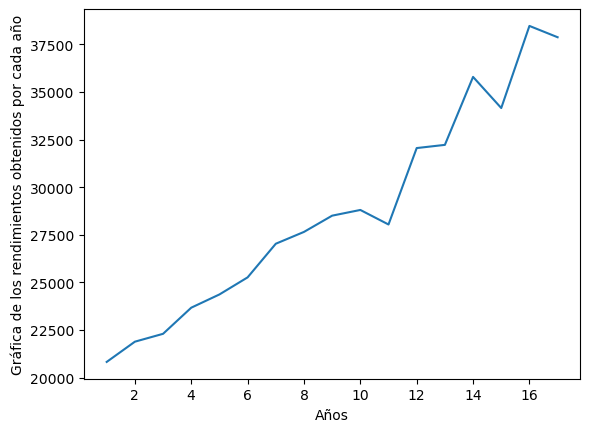

In [7]:
# Transpose the list to group values by position
transposed_lists = np.array(saved_by_year_by_sim).T

# Calculate the average for each position
averages = [np.mean(group) for group in transposed_lists]
plt.xlabel("Años")
plt.ylabel("Gráfica de los rendimientos obtenidos por cada año")
plt.plot(range(1, years+1), averages)

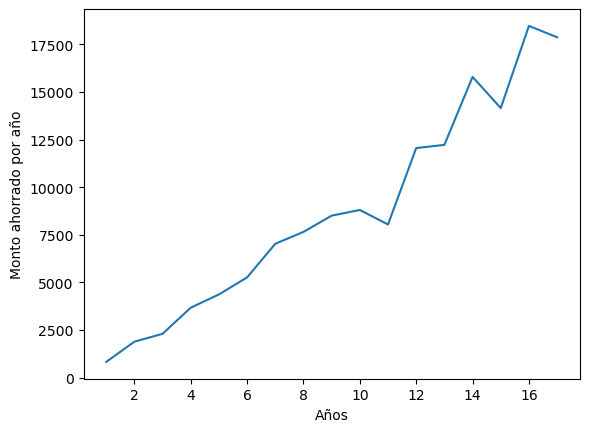

In [8]:
transposed_lists = np.array(interest_by_year_by_sim).T

# Calculate the average for each position and subtract 2000 times the position
averages = [np.mean(group) for group in transposed_lists]
plt.xlabel("Años")
plt.ylabel("Monto ahorrado por año")
plt.plot(range(1, years+1), averages) 

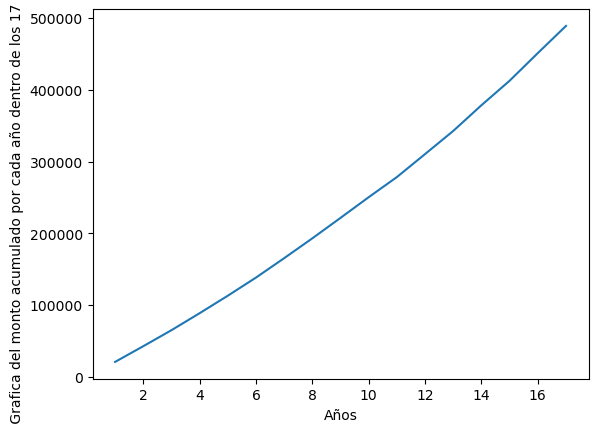

In [9]:
transposed_lists = np.array(accumulated_by_year_by_sim).T

# Calculate the average for each position and subtract 2000 times the position
averages = [np.mean(group) for group in transposed_lists]
plt.xlabel("Años")
plt.ylabel(" Grafica del monto acumulado por cada año dentro de los 17 años.")
plt.plot(range(1, years+1), averages) 

# Ejercicio 2

In [43]:
df = pd.read_csv('advertising.csv',  index_col=0)
variables = ['TV', 'Radio', 'Newspaper']

In [44]:
X = df[variables]
Y = df['Sales']
model = LinearRegression()
model.fit(X, Y)
print("Coefficients: ", model.coef_)
print("Intercept: ", model.intercept_)

Coefficients:  [ 0.04576465  0.18853002 -0.00103749]
Intercept:  2.9388893694594067


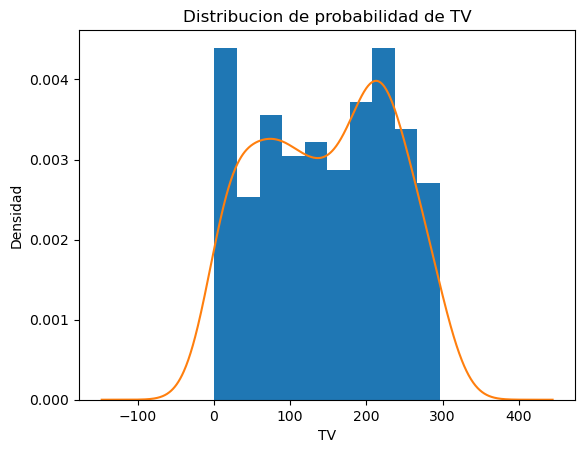

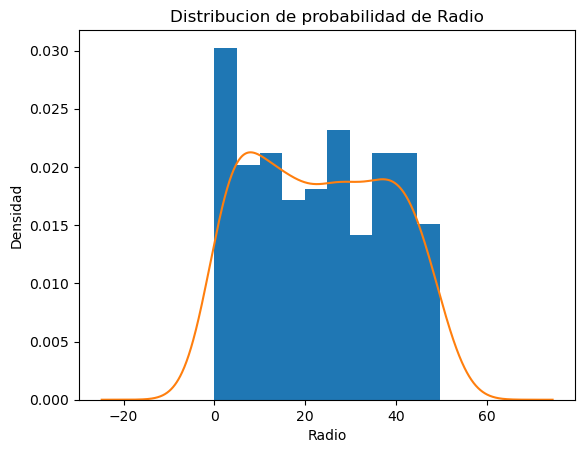

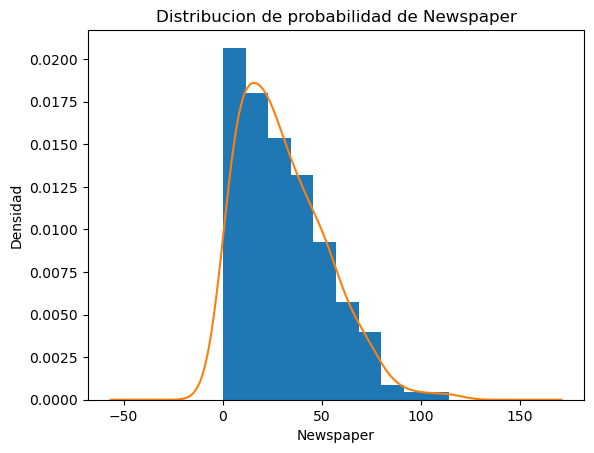

In [45]:
for var in variables:
    plt.figure()
    plt.hist(df[var], bins=10, density=True)
    df[var].plot(kind='kde')
    plt.xlabel(var)
    plt.ylabel("Densidad")
    plt.title(f"Distribucion de probabilidad de {var}")

In [46]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


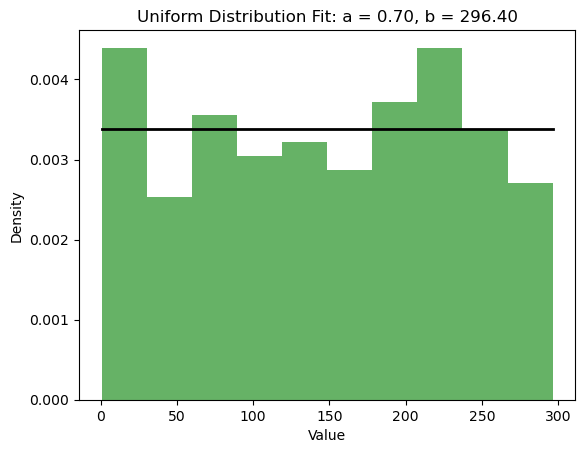

In [47]:
data=df["TV"]
a = data.min()
b = data.max()

# Step 2: Fit the uniform distribution
# In a uniform distribution, the distribution is described by 'loc' (a) and 'scale' (b-a)
loc, scale = a, b - a

# Step 3: Plot the histogram of the data
plt.hist(data, bins=10, density=True, alpha=0.6, color='g')

# Plot the uniform PDF
x = np.linspace(a, b, 100)
plt.plot(x, uniform.pdf(x, loc, scale), 'k-', lw=2)
plt.title(f'Uniform Distribution Fit: a = {a:.2f}, b = {b:.2f}')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()


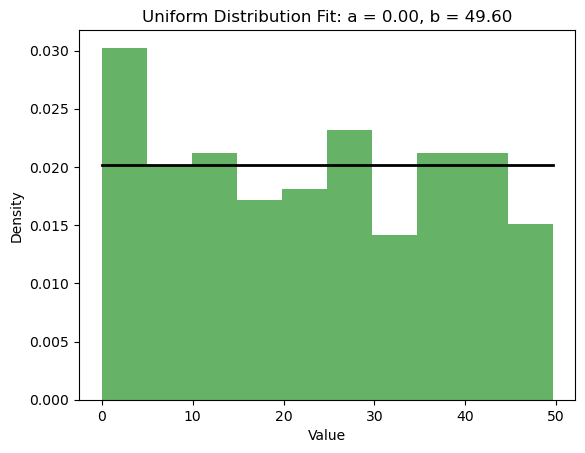

In [48]:
data=df["Radio"]
a = data.min()
b = data.max()

# Step 2: Fit the uniform distribution
# In a uniform distribution, the distribution is described by 'loc' (a) and 'scale' (b-a)
loc, scale = a, b - a

# Step 3: Plot the histogram of the data
plt.hist(data, bins=10, density=True, alpha=0.6, color='g')

# Plot the uniform PDF
x = np.linspace(a, b, 100)
plt.plot(x, uniform.pdf(x, loc, scale), 'k-', lw=2)
plt.title(f'Uniform Distribution Fit: a = {a:.2f}, b = {b:.2f}')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

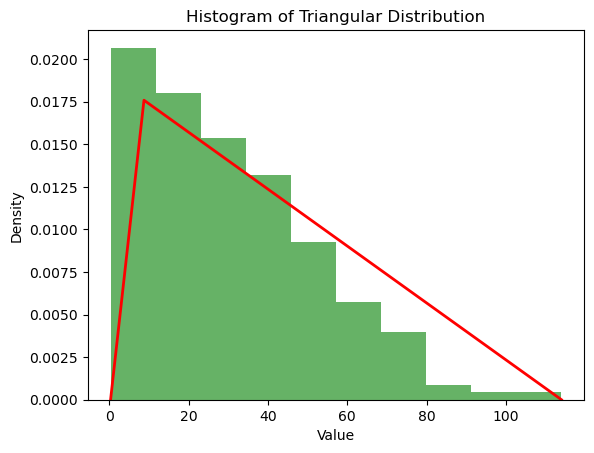

In [16]:
data = df["Newspaper"]
left = data.min()
right = data.max()
mode = data.mode()[0]
plt.hist(data, bins=10, density=True, alpha=0.6, color='g')
x = np.linspace(left, right, 1000)
pdf = np.where(x < mode, 2*(x-left)/((right-left)*(mode-left)), 2*(right-x)/((right-left)*(right-mode)))
plt.plot(x, pdf, 'r-', lw=2)

plt.title('Histogram of Triangular Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

In [49]:
def get_random_uniform_values(low, high, num_samples):
    return np.random.uniform(low, high, num_samples)
def get_random_triangular_values(left, mode, right, num_samples):
    return np.random.triangular(left, mode, right, num_samples)

In [59]:
n_sims = 1000
df_results = pd.DataFrame({'TV': [],'Radio': [],  'Newspaper': []})
for i in range(n_sims):
    highest_sale = 0
    X_best = None
    num_items = 200
    data = df["Radio"]
    random_radio = get_random_uniform_values(data.min(), data.max(), num_items)
    data = df["TV"]
    random_tv = get_random_uniform_values(data.min(), data.max(), num_items)
    data = df["Newspaper"]
    random_newspaper = get_random_triangular_values(data.min(), data.mode()[0], data.max(), num_items)
    X = pd.DataFrame({'TV': random_tv, 'Radio': random_radio, 'Newspaper': random_newspaper})
    result = model.predict(X)
    X_best = X.iloc[np.argmax(result)]
#     condition = (((df_results["TV"] == X_best["TV"]) & (df_results["Radio"] == X_best["Radio"]) & (df_results["Newspaper"] == X_best["Newspaper"]) ))
#     if condition.any():
#         print("Found")
#         found_row = df_results.loc[condition, "Count"]
#         found_row["Count"] = found_row + 1
#     else:
#         X_best["Count"] = 1
#         df_results = pd.concat([df_results, X_best.to_frame().T], ignore_index=True)
    df_results = pd.concat([df_results, X_best.to_frame().T], ignore_index=True)
        

## Valores de inversión de cada tipo de publicidad maximizando el valor de ventas

In [60]:
tv=round(df_results['TV'].mean(), 2)
radio=round(df_results['Radio'].mean(), 2)
newspaper=round(df_results['Newspaper'].mean(), 2)
print(f"TV: {tv}")
print(f"Radio: {radio}")
print(f"Newspaper: {newspaper}")

TV: 285.71
Radio: 46.88
Newspaper: 40.52


### Porcentaje

In [61]:
print(f"TV: {tv/(tv+radio+newspaper)*100:.2f}%")
print(f"Radio: {radio/(tv+radio+newspaper)*100:.2f}%")
print(f"Newspaper:  {newspaper/(tv+radio+newspaper)*100:.2f}%")

TV: 76.58%
Radio: 12.56%
Newspaper:  10.86%
